# Projeto 1 - Ciência dos Dados

Nome: João Pedro Reis Lima

Nome: Lucas Gurgel 

Atenção: Serão permitidos grupos de três pessoas, mas com uma rubrica mais exigente. Grupos deste tamanho precisarão fazer um questionário de avaliação de trabalho em equipe

___
Carregando algumas bibliotecas:

In [972]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import re 
import emoji
from emoji import UNICODE_EMOJI
from random import *
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
from nltk.stem import RSLPStemmer
nltk.download('rslp')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lucas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to
[nltk_data]     C:\Users\lucas\AppData\Roaming\nltk_data...
[nltk_data]   Package rslp is already up-to-date!


True

In [973]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
c:\Users\lucas\Downloads\Projeto-1-CDADOS


Carregando a base de dados com os tweets classificados como relevantes e não relevantes:

In [974]:
filename = 'esquadrão suicida 2.xlsx'

In [975]:
dados = pd.read_excel(filename)
dados.head(5)

,Treinamento,relevancia
0,to feliz q da p prestar atenção e gostar de vá...,1
1,os roteirista de esquadrão suicida 2 devem ter...,0
2,assistir esse esquadrão suicida 2 de marola,0
3,e eu e gilson que fechamos a sala de cinema p ...,0
4,"esquadrão suicida 2 é muito bom, amei o filme",1


In [976]:
test = pd.read_excel(filename, sheet_name = 'Teste')
test.head(5)

,Teste,relevancia
0,assisti esquadrão suicida 2 com um pouco de at...,0
1,"vou ver esquadrão suicida 2 hj, vcs já viram?",0
2,@lsdcomixxx adm hj eu sonhei que ele tava no e...,0
3,ranking personagens do esquadrão suicida:\n\n1...,1
4,mano gloria groove no esquadrão suicida 2 fico...,1


___
## Classificador automático de sentimento


## Relavante 
Comentários que demostravam alguma critica ao produto tais como: Se a pessoa gostou ou não da obra, o que ela sentiu(emoção), também consideramos personagens favoritos como algo relavante 

## Irrelevante
Não consideramos comentarios de situações adversas sem relação direta com a criticidade da obra, tal como comentarios pessoais

______________

### Limpando o Excel

sinais de pontuação e diversos 

Letras minusculas

Separação de emojis

aplicando Stopwords






In [977]:
def cleanup(text):
    punctuation = '[”@\-/!.:?;,_°''"|()#$%¨&*\n+={}ªº><]'
    pattern = re.compile(punctuation)
    text_subbed = re.sub(pattern, '', text)
    return text_subbed

In [978]:
def minusculo(text):  # colocando em letra minuscula
    return text.lower()

In [979]:
base_prepo = nltk.corpus.stopwords.words('portuguese')
def stopwords(lista):
    listas = []
    for word in lista:
        if word not in base_prepo:
            listas.append(word)
    return listas           

    

In [980]:
def removeradical(lista):
    listanova = []
    remove = RSLPStemmer()
    for text in lista:
        listanova.append(remove.stem(text))
    return listanova

In [981]:
def separa_emoji(text):
    pega = emoji.get_emoji_regexp().split(text)
    trasforma= ' '.join(pega)
    trasforma = trasforma.split()
    for i,text in enumerate(trasforma):
        if text in UNICODE_EMOJI['pt']:
            trasforma[i]=UNICODE_EMOJI['pt'][text].replace(':','')
        elif text in UNICODE_EMOJI['en']: 
            trasforma[i]= UNICODE_EMOJI['en'][text].replace(':','')
        else:
            continue
    trasforma=' '.join(trasforma)  
    return trasforma

In [982]:
def limpatudo(text):  # função que aplica as limpezas anteriores 
    tira_pontuacao = cleanup(text)
    tudo_minusculo = minusculo(tira_pontuacao)
    limpoemoji = (separa_emoji(tudo_minusculo))
    lista_limpo = limpoemoji.split()
    Semstopwords = stopwords(lista_limpo)
    semstemming = removeradical(Semstopwords)
    limpo = " ".join(semstemming)
    return limpo



In [983]:
def lista(df):   # Função que separa as Frases em palavras
    listaf = []
    lista = df.values.tolist() 
    for i in lista:
        for palavra in i.split():
            listaf.append(palavra)
    return listaf

______________________________
## Começando o Classificador Naive-Bayes
Vamos separar as variaveis necessárias para a implementação do naive bayers assim como filtrar e aplicar a funcao de limpeza na nossa base de dados

Considerando apenas as mensagens da planilha Treinamento:

In [984]:
#Transformando palavras em variáveis categóricas:
dados['Treinamento'] = dados['Treinamento'].astype('category')
test['Teste'] = test['Teste'].astype('category')

In [985]:
#aplicando a limpeza 
dados['Treinamento']=dados['Treinamento'].apply(limpatudo)
test['Teste']=test['Teste'].apply(limpatudo)

In [986]:
#Separando a Planilha de Treinamento de acordo com a relevancia

IR = dados['relevancia'] == 0
R = dados['relevancia'] == 1

dados_r = dados.loc[R,:]
dados_ir = dados.loc[IR,:]

dados_r.head()

,Treinamento,relevancia
0,to feliz q p prest atenç gost vári person esqu...,1
4,esquadr suic 2 bom ame film,1
5,henriquenarizz kkkkkk amig pi esquadr suic 2 t...,1
8,ruanfalc dccomic tô p assist esquadr suic 2 ag...,1
16,ei gost esquadr suic 2 opin import,1


In [987]:
#Aplicando a separação das frases no dataframe de treinamento 
pdr = lista(dados_r.Treinamento)   
pdir = lista(dados_ir.Treinamento)

#Transformando o em pd.series
pdrc = pd.Series(pdr) 
pdirc = pd.Series(pdir) 

#Extraindo a frequência absoluta
fpdr=pdrc.value_counts()
fpdir=pdirc.value_counts()



suic       138
2          138
esquadr    128
film        40
bom         25
          ... 
nad          1
far          1
cadel        1
começ        1
promoç       1
Length: 523, dtype: int64

In [988]:
# Colocando as palavras em um Banco de dados e uma lista total
listadr = pdrc.tolist()
listadir = pdirc.tolist()

#criando a lista total
lista_total2 = pd.Series(listadr + listadir)

#criando o banco de dados
Banco_de_dados=set(listadr+listadir)


____________
## Probabilidades Iniciais
Aqui nós iremos calcular a probabilidade de palavras relevantes e irrelevantes no conjunto total

A soma entre as probabilidades de ser relevante ou irrelevante tem que ser igual a 1

## P(relevante) + P(irrelevante) = 1



In [989]:
# probabilidade de ser relevante:
pr = len(listadr)/len(lista_total2)
# probabilidade de ser irrelevante:
pi = len(listadir)/len(lista_total2)
print(pr+pi)

1.0


______________
## Suavização de Laplace

Técnica que é ultilizada para garantir que o naive-bayes seja ultilizado como palavra fora do banco de dados, ou seja, evitar que a probabilidade seja 0

Aplicando a suavização:

In [990]:
# função que aplica o laplace
def laplace(freqabsoluta,conjunto):
    return (freqabsoluta+1)/((conjunto)+len(Banco_de_dados))

In [991]:
# função que determina a probabilidade relevante dado a uma frase
def prob_R(text):
    Prob1 = 1
    for i in text.split():
        if i in fpdr:

            Alaplace_relevante = laplace(fpdr[i], pr)
        
            Prob1 *= Alaplace_relevante
        else:
            Alaplace_relevante = laplace(0, pr)
        
            Prob1 *= Alaplace_relevante
    return Prob1

print(prob_R('assistir esse esquadrão suicida 2 de marola'))



3.293083860697365e-20


In [992]:
# função que determina a probabilidade irrelevante dado a uma frase
def prob_I(text):
    Prob2 = 1
    for i in text.split():
        if i in fpdir:

            Alaplace_irrelevante = laplace(fpdir[i], pi)
        
            Prob2 *= Alaplace_irrelevante
        else:
            Alaplace_irrelevante = laplace(0, pi)
        
            Prob2 *= Alaplace_irrelevante
    return Prob2


In [993]:
# fazendo a comparação das probabilidades para delvolver se é relevante ou não
def probabilidades(text):
    if prob_R(text)*pr > prob_I(text)*pi:
        return 1
    else:
        return 0

print(probabilidades('vi esquadrão suicida 2 hj com minhas irmã ')) 

0


In [994]:
dados['Classificado'] = dados.Treinamento.apply(probabilidades)
dados.head()

,Treinamento,relevancia,Classificado
0,to feliz q p prest atenç gost vári person esqu...,1,1
1,roteir esquadr suic 2 dev ter beb um 10 shot t...,0,0
2,assist esquadr suic 2 marol,0,0
3,gilson fech sal cinem p assist esquadr suic 2 ...,0,0
4,esquadr suic 2 bom ame film,1,1


___
### Verificando a performance do Classificador



In [995]:
#Aqui nos verificamos a acuracia do nosso modelo para a base de treinamento

dadossepara1=dados.loc[(dados['Classificado']==1)&(dados['relevancia']==1),:]
dadosverdadeiro1=dadossepara1.shape[0]
dadossepara2=dados.loc[(dados['Classificado']==0)&(dados['relevancia']==0),:]
dadosverdadeiro2=dadossepara2.shape[0]
soma1 = dadosverdadeiro1 + dadosverdadeiro2
score2=soma1/dados.shape[0]
print(score2*100)

95.33333333333334


In [996]:
# aplicando a função do naive-bayes na base de test
test['Classificado']=test.Teste.apply(probabilidades)
test.head()

,Teste,relevancia,Classificado
0,assist esquadr suic 2 pouc atras pacific pod v...,0,0
1,vou ver esquadr suic 2 hj vc vir,0,0
2,lsdcomixxx adm hj sonh tav esquadr suic 2,0,0
3,ranking person esquadr suicida1 bloodsport2 pe...,1,0
4,man glor groov esquadr suic 2 fic mto bom,1,0


In [997]:
#Aqui nos verificamos a acuracia do nosso modelo para a base de Teste

testsepara1=test.loc[(test['Classificado']==1)&(test['relevancia']==1),:]
testverdadeiro1=testsepara1.shape[0]
testsepara2=test.loc[(test['Classificado']==0)&(test['relevancia']==0),:]
testverdadeiro2=testsepara2.shape[0]
soma = testverdadeiro1 + testverdadeiro2
score=soma/test.shape[0]
print(score*100)

78.5


In [998]:
#Verificando a performance com as porcentagens de Verdadeiro positivoS, verdadeiro negativo e etc
pd.crosstab(test['Classificado'], test['relevancia'], normalize=True)


relevancia,0,1
Classificado,,
0,0.500,0.140
1,0.075,0.285


## Verdadeiro Positivo (relevantes classificados como relevantes): 28,5%

## Verdadeiro Negativo (irrelevantes classificadas como irrelevantes): 50%

## Falso Positivo (relevantes classificadas como irrelevantes): 14%

## Falso Negativo (irrelevantes classificadas como relevantes): 7,5%

___
### Concluindo

Dado o exposto, percebe-se que o nosso modelo baseado no Naive Bayes, podemos concluir a partir das respectivas porcentagens do verdadeiro positivo e verdadeiro negativo: 28,5% e 50%, as quais juntas somam 78,5% de acurácia, isso mostra que o nosso modelo é eficiente. Entretanto, os respectivos valores de falso positivo e negativo: 14% e 7,5%, ainda possuem altas taxas, isso ocorre por vários motivos, tal como a baixa variedade de palavras no banco de dados, o que faz com que palavras que possuem similaridade, as que são classificadas como relevante e irrelevante, não estão na base de dados, mesmo possuindo semântica e significados análogos e que no cálculo suas probabilidades não são levadas em consideração(são nulo/0). Outro fator importante na análise e que também confirma o que foi, anteriormente, visto é a diferença entre os percentuais de acurácia entre a base de treinamento e teste, que é de cerca de de 16,8%, isso acontece, pois o tamanho da base de dados é diferente e isso implica na acurácia na base Teste.    


Além disso, nosso modelo na maioria das vezes não apresenta problema com as palavras de dupla negação ou sarcasmo,mas mesmo assim, nossa função não leva em consideração o real sentido da palavra e sim somente sua probabilidade, o que faz com que possa ter certos erros, por exemplo: 

In [999]:
# 1 = relevante
# 0 = irrelevante


print(probabilidades('esquadrão suicida 2 é tão ruim que é bom')) 
print(probabilidades('Começou esquadrão suicida 2 e o filme não foi nada demais')) #Fase criada para titulo de demonstração do problema (dupla negação)
print(probabilidades('esquadrão suicida 2 é tão ruim quanto assistir esquadrão suicida 1 2 vezes')) #Fase criada para titulo de demonstração do problema (sarcasmo)

1
0
1


Podemos concluir que nas frases anteriores, o nosso sistema ainda comete erros, porém em algumas frases pode ser visto que ele acerta na classificação, visto que é uma critica ao produto, ou seja, é relevante.

____________
## Plano de expansão e por que devem financiar nosso projeto

Portanto, eles devem continuar financiando nosso projeto, visto que com melhorias nesses problemas vistos anteriormente, podemos desenvolver um sistema melhor, com uma melhor acurácia, o qual poderia ser implementado em outras situações, um exemplo disso seria a propia empresa da DC com a nossa análise de dados verificar como os fãs/midia está comentando sobre o filme, o que pode ser interpretado como um potencial para analisar seu produto ou ate coletar informações críaticas para futuros projetos se baseando na opinião geral. Dessa forma, com um maior financiamento podemos tornar nosso modelo mais eficiente com novas funções.

## PORQUÊ NÃO PODE USAR O PRÓPRIO CLASSIFICADOR PARA GERAR MAIS AMOSTRAS DE TREINAMENTO?
Como já foi dito anteriormente, o nosso modelo não entende o real sentido da palavra em seus diferentes contextos, logo aumentar o número de palavras só acarretaria em uma menor porcentagem na taxa de acurácia, além de que o erro poderia se propagar durante a reprodução de mais amostras.

## Diferente cenários para Naives Bayes fora do contexto do projeto. 
1º - Podemos usar o nosso sistema para a detecção de emails, podendo classifica-los entre aqueles que são relevantes ou não, podendo , aqueles que não são relevantes, enviados para a caixa de spam.

2º - Outra situação bastante útil, seria analisar textos em redes sociais, onde o sistema detectaria se tal mensagem feita por uma pessoas demonstra felicidade ou tristeza, tal feito ajudaria na descoberta de possíveis problemas que a pessoa poderia esta passando.

3º - Outra, seria em prever se vai chover ou não no próximo dia, de acordo com as medições no dia de hoje, analisando a umidade, temperatura, por exemplo.


## Sugestões de melhorias reais:
TF-IDF: Um método onde entendemos a importância de uma palavra, em decorrência de sua aparição. Para fazer tal cálculo, precisamos da frequência da palavra em um documento, e sua frequência inversa do documento (OBS: quanto mais proximo de 0 for esse valor, significa que a mesma é comum, mais perto de 1 , diz que a mesma não é comum), com isso podemos saber se aquela palavra é comum ou específica naquele documento. Após a multiplicação, podemos obter o resultado, quanto maior for o valor, sabemos que a palavra é relevante.

N-Grams: Diferentemente do método que nós usamos, o N-Grams considera a frase completa, por meio de gramas, logo não precisavamos "quebra-las", tal método pode ser implementado usando sua função 'ngram' através da biblioteca nltk ou bigrams que pode ser importada da mesma biblioteca, porém essa última tem um certo limite de gramas que podem ser utilizados, diferentemente da ngram, devendo ter cuidado para não ter uma escassez de dados.

___
### Qualidade do Classificador a partir de novas separações dos tweets entre Treinamento e Teste

Utilizaremos o sklearn com a função train_test_split

A função divide o conjunto dado em uma quantidade que podemos escolher para separar entre teste e treinamento que escolhermos, nesse caso vamos separar 200 pro teste e 300 para o treinamento

Assim sendo, aqui o objetivo é avaliar como os tweets contidos na base de dados
treinamento pode interferir numa melhor ou não tão boa classificação das mensagens
contidas na base de teste.

guardaremos os percentuais de acertos (= % de positivos verdadeiros + % de
negativos verdadeiros)

Vamos Repitir o processo acima 100 vezes

In [1000]:
#lendo novamente os arquivos
test_novo = pd.read_excel(filename, sheet_name = 'Teste')
dados_novo = pd.read_excel(filename, sheet_name = 'Treinamento')

#Concatenando as planilhas do excel tem que mudar para o mesmo nome da coluna
xaropinho = dados_novo.rename(columns={'Treinamento':'Frases'})
xaropinha = test_novo.rename(columns={'Teste':'Frases'})

junta = pd.concat([xaropinho,xaropinha], ignore_index=True)
junta['Frases']=junta['Frases'].apply(limpatudo)


In [1001]:
lista_score=[]
for i in range(0,100):
    X_dados,X_test = train_test_split(junta,train_size=0.6,random_state=None) # aplicando a função e separando as bases
    # criamos uma copia para evitar erros
    X_dados = X_dados.copy()
    X_test = X_test.copy()

    #separamos o que é relevante ou irrelevante
    X_dadosIr = X_dados['relevancia'] == 0
    X_dadosR = X_dados['relevancia'] == 1

    X_dados_r = X_dados.loc[X_dadosR,:]
    X_dados_ir = X_dados.loc[X_dadosIr,:]

    #aplicamos a função para separar as frases
    X_dadosr = lista(X_dados_r.Frases)   
    X_dadosir = lista(X_dados_ir.Frases)
    
    #Transformando o em pd.series
    X_dadosrC = pd.Series(X_dadosr) 
    X_dadosirC = pd.Series(X_dadosir) 

    # extraindo a frequência absoluta
    fpdr=X_dadosrC.value_counts()
    fpdir=X_dadosirC.value_counts()

    # Colocando as palavras em um Banco de dados e uma lista total
    X_dadosr = X_dadosrC.tolist()
    X_dadosir = X_dadosirC.tolist()

    #criando a lista universo e criando a base de dados
    listaX_dados = pd.Series(X_dadosr + X_dadosir)

    Banco_de_dados=set(X_dadosr+X_dadosir)

    # probabilidade de ser relevante:
    pr = len(X_dadosr)/len(listaX_dados)
    # probabilidade de ser irrelevante:
    pi = len(X_dadosir)/len(listaX_dados)

    #ultilizado a função para aplicar o naive-bayes
    X_dados['Nova Classificação'] = X_dados.Frases.apply(probabilidades)
    X_test['Nova Classificação'] = X_test.Frases.apply(probabilidades)
    
    # obtendo as taxes de verdadeiro positivo e negativo e colocando em um lista os scores
    X_testsepara1=X_test.loc[(X_test['Nova Classificação']==1)&(X_test['relevancia']==1),:]
    X_testverdadeiro1=X_testsepara1.shape[0]
    X_testsepara2=X_test.loc[(X_test['Nova Classificação']==0)&(X_test['relevancia']==0),:]
    X_testverdadeiro2=X_testsepara2.shape[0]
    soma = X_testverdadeiro1 + X_testverdadeiro2
    score=soma/X_test.shape[0]

    
    lista_score.append(score*100)

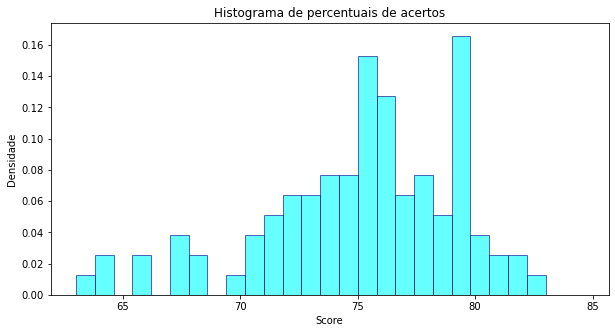

In [1002]:
faixa=np.arange(63, 85, 0.8)
plt.figure(figsize=(10, 5))
plt.hist(lista_score, bins=faixa, edgecolor='darkblue', color='cyan', alpha=0.6, density=True)
plt.title('Histograma de percentuais de acertos')
plt.ylabel('Densidade')
plt.xlabel('Score')
plt.show()




In [1003]:
media=sum(lista_score)/len(lista_score)
print(media)

74.74


Podemos concluir que quando o classificador é feito em uma única divisão entre treinamento e teste, o modelo pode assumir valores bem distintos, o que tem como consequência no campo da análise, uma mitigação na sua credibilidade, por isso é de extrema importância que seja feita uma análise de dados considerando as possíveis variações de resultados, como visto, em decorrer dos scores obtidos 100X. Em suma, percebe-se que é uma desvantagem fazer uma única divisão da base de dados, pois não retornará a melhor acurácia do modelo. 

___
## Aperfeiçoamento:

Trabalhos que conseguirem pelo menos conceito B vão evoluir em conceito dependendo da quantidade de itens avançados:

* IMPLEMENTOU outras limpezas e transformações que não afetem a qualidade da informação contida nos tweets. Ex: stemming, lemmatization, stopwords
* CORRIGIU separação de espaços entre palavras e emojis ou entre emojis e emojis
* CRIOU categorias intermediárias de relevância baseadas na probabilidade: ex.: muito relevante, relevante, neutro, irrelevante, muito irrelevante. Pelo menos quatro categorias, com adição de mais tweets na base, conforme enunciado. (OBRIGATÓRIO PARA TRIOS, sem contar como item avançado)
* EXPLICOU porquê não pode usar o próprio classificador para gerar mais amostras de treinamento
* PROPÔS diferentes cenários para Naïve Bayes fora do contexto do projeto
* SUGERIU e EXPLICOU melhorias reais com indicações concretas de como implementar (indicar como fazer e indicar material de pesquisa)
* FEZ o item 6. Qualidade do Classificador a partir de novas separações dos tweets entre Treinamento e Teste descrito no enunciado do projeto (OBRIGATÓRIO para conceitos A ou A+)

___
## Referências

[Naive Bayes and Text Classification](https://arxiv.org/pdf/1410.5329.pdf)  **Mais completo**

[A practical explanation of a Naive Bayes Classifier](https://monkeylearn.com/blog/practical-explanation-naive-bayes-classifier/) **Mais simples**

https://monkeylearn.com/blog/what-is-tf-idf/
--
https://sebastianraschka.com/Articles/2014_naive_bayes_1.html #n-grams
--
https://qastack.com.br/programming/17531684/n-grams-in-python-four-five-six-grams
--
https://qastack.com.br/programming/5486337/how-to-remove-stop-words-using-nltk-or-python #stop words
--
https://www.programcreek.com/python/?CodeExample=remove+emoji #emoji
--
https://blog.geekhunter.com.br/mineracao-de-texto-python-para-descobrir-emocoes/ #limpeza